<a href="https://colab.research.google.com/github/Calaside/GTM-Setup---Challenge-2/blob/main/Linear_regression_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## First, we are going to select valid features and data for a classic linear regression model.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/df_final.csv')

# Deleting the columns that seems unusable or not relevant for our target.

In [3]:
df['state'] = df['state_y']

In [4]:
df = df.drop(columns=['zip_code', 'primary_city', 'county', 'latitude', 'longitude', 'status', 'state_y', 'Unnamed: 0', 'city', 'total_men', 'total_women', 'total_citizen', 'restaurant_count', 'transport_count'])

In [ ]:
## I chose to keep only the most relevant features about the building and the county. As categorical data, I only kept the state because of the amount of categories it would need (10 000+).

In [5]:
df.head()

,price,bed,bath,acre_lot,house_size,school_count,grocery_store_count,total_pop,total_employed,mean_income,total_income,prop_employed,state
0,105000.0,3.0,2.0,0.12,920.0,12.0,4.0,18962,4093,7434.83,65587.0,21.585276,PR
1,80000.0,4.0,2.0,0.08,1527.0,12.0,4.0,18962,4093,7434.83,65587.0,21.585276,PR
2,67000.0,2.0,1.0,0.15,748.0,0.0,0.0,49259,14900,8438.69,220782.0,30.248280,PR
3,145000.0,4.0,2.0,0.10,1800.0,0.0,0.0,156054,41711,9463.93,718227.0,26.728568,PR
4,179000.0,4.0,3.0,0.46,2520.0,20.0,10.0,92511,23545,8624.60,375601.0,25.451027,PR


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191183 entries, 0 to 2191182
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   price                float64
 1   bed                  float64
 2   bath                 float64
 3   acre_lot             float64
 4   house_size           float64
 5   school_count         float64
 6   grocery_store_count  float64
 7   total_pop            int64  
 8   total_employed       int64  
 9   mean_income          float64
 10  total_income         float64
 11  prop_employed        float64
 12  state                object 
dtypes: float64(10), int64(2), object(1)
memory usage: 217.3+ MB


In [8]:
df.describe()

,price,bed,bath,acre_lot,house_size,school_count,grocery_store_count,total_pop,total_employed,mean_income,total_income,prop_employed
count,2.191183e+06,2.191183e+06,2.191183e+06,2.191183e+06,2.191183e+06,2.191183e+06,2.191183e+06,2.191183e+06,2.191183e+06,2.191183e+06,2.191183e+06,2.191183e+06
mean,4.810413e+05,3.197470e+00,2.361804e+00,5.373682e+00,1.934777e+03,1.359397e+01,5.722390e+00,1.118852e+06,5.197720e+05,2.848143e+04,1.519502e+07,4.532143e+01
std,6.604580e+05,1.028725e+00,9.981487e-01,9.584627e+01,9.108360e+02,7.926232e+00,6.798875e+00,1.979939e+06,9.119542e+05,7.322467e+03,2.725681e+07,5.160899e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,4.330000e+02,2.050000e+02,5.796330e+03,2.043800e+04,1.656774e+01
25%,1.659000e+05,3.000000e+00,2.000000e+00,1.700000e-01,1.452000e+03,5.000000e+00,0.000000e+00,1.030390e+05,4.521300e+04,2.390149e+04,1.115357e+06,4.229898e+01
50%,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.760000e+03,2.000000e+01,3.000000e+00,3.662800e+05,1.648420e+05,2.743868e+04,4.672476e+06,4.617738e+01
75%,5.499000e+05,4.000000e+00,3.000000e+00,6.600000e-01,2.136000e+03,2.000000e+01,9.000000e+00,1.017859e+06,5.099200e+05,3.144022e+04,1.574942e+07,4.841847e+01
max,9.999999e+06,1.900000e+01,1.900000e+01,9.999000e+03,9.999000e+03,2.000000e+01,2.000000e+01,1.003839e+07,4.635465e+06,6.766589e+04,1.409067e+08,6.408498e+01


# Heatmap to see correlations between our target, the price, and the features.

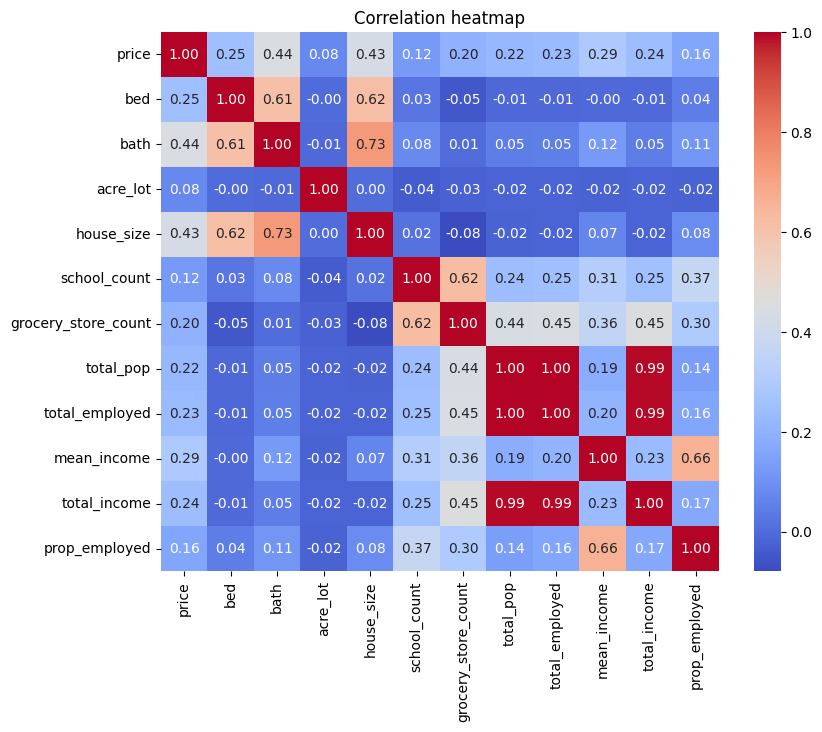

In [10]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numeric.corr()

# Heatmap creation
plt.figure(figsize=(9, 7))  # size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

plt.title("Correlation heatmap")
plt.show()

We can see here that there is indeed some correlations between our features and the price, except for "acre_lot". Since I am not sure of the meaning of this column index I choose to delete it and not integrate those data in our model.

In [11]:
df = df.drop(columns=['acre_lot'])

In [12]:
# Selecting our X and Y for the target and features.

X = df.drop(columns=['price'])
Y = df['price']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1752946 entries, 2152418 to 1692743
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   bed                  float64
 1   bath                 float64
 2   house_size           float64
 3   school_count         float64
 4   grocery_store_count  float64
 5   total_pop            int64  
 6   total_employed       int64  
 7   mean_income          float64
 8   total_income         float64
 9   prop_employed        float64
 10  state                object 
dtypes: float64(8), int64(2), object(1)
memory usage: 160.5+ MB


In [15]:
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 1752946 entries, 2152418 to 1692743
Series name: price
Non-Null Count    Dtype  
--------------    -----  
1752946 non-null  float64
dtypes: float64(1)
memory usage: 26.7 MB


In [ ]:
# To compare our models, I'll apply a RANSAC mask on one hand to filter potential outliers and on another hand I'll train the linear regression model on our unfiltered data.
# For residual_treshold in the RANSAC I'll take 20% of the target mean so 96208.

In [16]:
## Standardisation of numerical features

X_test_numerical = X_test[['bed',
                           'bath',
                           'house_size',
                           'school_count',
                           'grocery_store_count',
                           'total_pop',
                           'total_employed',
                           'total_income']]
X_train_numerical = X_train[['bed',
                           'bath',
                           'house_size',
                           'school_count',
                           'grocery_store_count',
                           'total_pop',
                           'total_employed',
                           'total_income']]

# Data standardisation

In [17]:
scaler = StandardScaler()

X_test_numerical_standard = scaler.fit_transform(X_test_numerical)
X_train_numerical_standard = scaler.transform(X_train_numerical)

df_X_test_numerical_standard = pd.DataFrame(X_test_numerical_standard, columns=X_test_numerical.columns)
df_X_train_numerical_standard = pd.DataFrame(X_train_numerical_standard, columns=X_train_numerical.columns)

df_X_test_numerical_standard.reset_index(drop=True, inplace=True)
df_X_train_numerical_standard.reset_index(drop=True, inplace=True)

In [18]:
## Standardization of categorical features

X_test_categorical = X_test[['state']]
X_train_categorical = X_train[['state']]

ohe = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X_test_categorical_standard = ohe.fit_transform(X_test_categorical)
X_train_categorical_standard = ohe.transform(X_train_categorical)

df_X_test_categorical_standard = pd.DataFrame(X_test_categorical_standard, columns=ohe.get_feature_names_out())
df_X_train_categorical_standard = pd.DataFrame(X_train_categorical_standard, columns=ohe.get_feature_names_out())

df_X_test_categorical_standard.reset_index(drop=True, inplace=True)
df_X_train_categorical_standard.reset_index(drop=True, inplace=True)

# Linear regression on all data

In [19]:
## Merging the datas and training the model with the data without inlier mask
df_X_test_standardized = pd.merge(df_X_test_numerical_standard, df_X_test_categorical_standard, left_index=True, right_index=True)
df_X_train_standardized = pd.merge(df_X_train_numerical_standard, df_X_train_categorical_standard, left_index=True, right_index=True)

model = LinearRegression()

model.fit(df_X_train_standardized, Y_train)

LinearRegression()

In [20]:
## Model caracteristics after training with standardized but not filtered datas
Y_pred = model.predict(df_X_test_standardized)

print("Model trained with all data:")
print("R²:", r2_score(Y_test, Y_pred))
print("MAE:", mean_absolute_error(Y_test, Y_pred))
print("MSE:", mean_squared_error(Y_test, Y_pred))

Model trained with all data:
R²: 0.35549439708369723
MAE: 263714.7535995363
MSE: 282039529960.41626


In [ ]:
## R2 very low and MAE/MSE seems to indicate that we have some lots of outliers that might interfere with our model.

# Linear regression with the RANSAC method to filter outliers

In [22]:
ransac = RANSACRegressor(estimator=LinearRegression(), residual_threshold=96208.0, random_state=0)
ransac.fit(X_train_numerical, Y_train)

# Re-evaluate inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

print("Number of inliers:", sum(inlier_mask))
print("Number of outliers:", sum(outlier_mask))

Number of inliers: 429638
Number of outliers: 1323308


In [ ]:
## As we suspected above, there is lots of outliers (3/4). We still have a lot of data for our model training so, let's go.

In [23]:
X_inliers = X_train_numerical[inlier_mask]
Y_inliers = Y_train[inlier_mask]

In [24]:
model.fit(X_inliers, Y_inliers)
Y_pred_inliers = model.predict(X_inliers)

print("Model trained with inliers only:")
print("R²:", r2_score(Y_inliers, Y_pred_inliers))
print("MAE:", mean_absolute_error(Y_inliers, Y_pred_inliers))
print("MSE:", mean_squared_error(Y_inliers, Y_pred_inliers))

Model trained with inliers only:
R²: 0.9537994699860873
MAE: 47237.99549692195
MSE: 3000409612.971803


In [ ]:
## I did train my model on RANSACregression filtered data without any standardisation to avoid data leakage. It seems working but I'll do it with standardized data also.

In [ ]:
## Now I'll try to predict the price with another model, the random forest.

## Other method for prediction with lots of outliers, Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [28]:
# Model initiating and fitting
## Lots of columns due to the categorical feature (state, so 50+ columns)
random_forest_model = RandomForestRegressor(n_estimators=50, random_state=42)
random_forest_model.fit(df_X_train_numerical_standard, Y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [30]:
# Evaluation
Y_pred = random_forest_model.predict(df_X_test_numerical_standard)
print("Model trained with all data:")
print("R²:", r2_score(Y_test, Y_pred))
print("MAE:", mean_absolute_error(Y_test, Y_pred))
print("MSE:", mean_squared_error(Y_test, Y_pred))

Model trained with all data:
R²: 0.5846901731958419
MAE: 172839.5911976841
MSE: 181742079215.094


In [ ]:
## Better score than the Linear regression model but not great with all the data (inliers and Outliers)

In [31]:
# Model initiating and fitting
## Lots of columns due to the categorical feature (state, so 50+ columns)
random_forest_model = RandomForestRegressor(n_estimators=50, random_state=42)
random_forest_model.fit(X_inliers, Y_inliers)

RandomForestRegressor(n_estimators=50, random_state=42)

In [33]:
Y_pred = random_forest_model.predict(X_inliers)
print("Model trained with inliers only:")
print("R²:", r2_score(Y_inliers, Y_pred))
print("MAE:", mean_absolute_error(Y_inliers, Y_pred))
print("MSE:", mean_squared_error(Y_inliers, Y_pred))

Model trained with inliers only:
R²: 0.9877570998637115
MAE: 19646.327251402916
MSE: 795092940.4600295


# Calculating features importance with the RandomForest

In [35]:
importance = random_forest_model.feature_importances_
df_importance = pd.DataFrame({'Feature': X_inliers.columns, 'Importance': importance})
df_importance = df_importance.sort_values(by='Importance', ascending=False)
print(df_importance)

               Feature  Importance
1                 bath    0.340766
2           house_size    0.242043
4  grocery_store_count    0.162837
7         total_income    0.123388
5            total_pop    0.074621
6       total_employed    0.035117
3         school_count    0.016458
0                  bed    0.004770


<BarContainer object of 8 artists>

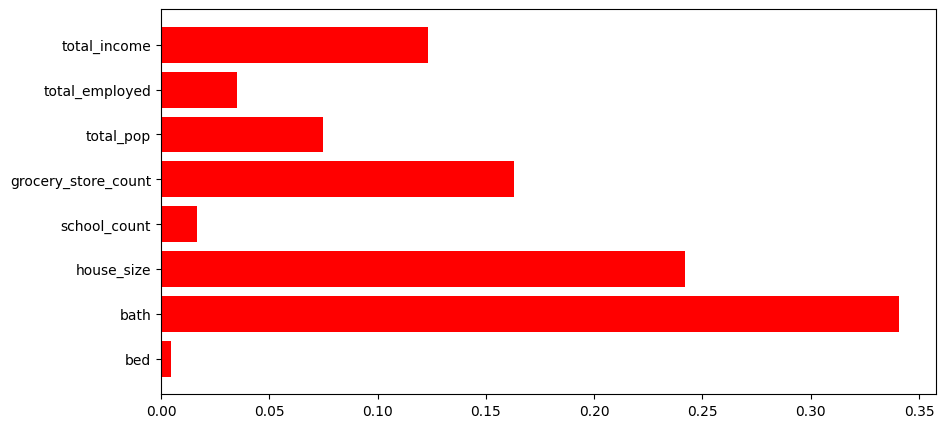

In [37]:
## Better showing feature importance better
plt.figure(figsize=(10, 5))
plt.barh(X_inliers.columns, importance, color='red')

We can see that the three first features by importance are the baths count, the house size and afterwards the grocery count in the neighborhood. The data enrichment from the previous notebook appears to be relevant.

On another hand Interesting to see that the bed feature seems to be not that important, maybe due to some noise or bad data integration.